In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [3]:
x = torch.flatten(train_data.data/256,start_dim=1).float()
y = train_data.targets

In [4]:
din, dh, dout = 784,256,10 # input, hidden, output layer의 노드 수
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh), #input에서 hidden layer로
    torch.nn.ReLU(),
    torch.nn.Linear(dh,dh),
    torch.nn.ReLU(),
    torch.nn.Linear(dh,dout), #hidden에서 output layer로
    torch.nn.Softmax(dim = 1)
)

In [5]:
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [6]:
loss_list = np.zeros(600)
for epoch in range(600):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss_list[epoch] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [7]:
prediction=y_pred.max(1)[1]
correct = (prediction == y)
accuracy = correct.sum()/y.size(0)
accuracy

tensor(0.9916)

In [8]:
X = torch.flatten(test_data.data/256,start_dim=1).float()
Y = test_data.targets

In [9]:
Y_pred = model(X)
prediction=Y_pred.max(1)[1]
correct = (prediction == Y)
accuracy = correct.sum()/Y.size(0)
accuracy

tensor(0.9732)

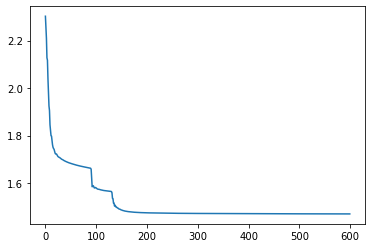

In [10]:
plt.plot(loss_list)
# loss가 200번 반복 이상에서는 거의 줄어들지 않아 200번을 넘어버린다면 overfitting의 가능성이 있어 200번으로 했습니다.

In [18]:
x = torch.flatten(train_data.data/256,start_dim=1).float()
y = train_data.targets

In [19]:
for epoch in range(200):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [20]:
prediction=y_pred.max(1)[1]
correct = (prediction == y)
accuracy = correct.sum()/y.size(0)
accuracy

tensor(0.9926)

In [21]:
X = torch.flatten(test_data.data/256,start_dim=1).float()
Y = test_data.targets

In [22]:
Y_pred = model(X)
prediction=Y_pred.max(1)[1]
correct = (prediction == Y)
accuracy = correct.sum()/Y.size(0)
accuracy

tensor(0.9730)